### HomeWork 2

Problem description:
<br>
Predicting whether a customer will change telecommunications provider, something known as "churning".
<br>
Dataset info:
<br>
The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

- "state", string. 2-letter code of the US state of customer residence
- "account_length", numerical. Number of months the customer has been with the current telco provider
- "area_code", string="area_code_AAA" where AAA = 3 digit area code.
- "international_plan", (yes/no). The customer has international plan.
- "voice_mail_plan", (yes/no). The customer has voice mail plan.
- "number_vmail_messages", numerical. Number of voice-mail messages.
- "total_day_minutes", numerical. Total minutes of day calls.
- "total_day_calls", numerical. Total minutes of day calls.
- "total_day_charge", numerical. Total charge of day calls.
- "total_eve_minutes", numerical. Total minutes of evening calls.
- "total_eve_calls", numerical. Total number of evening calls.
- "total_eve_charge", numerical. Total charge of evening calls.
- "total_night_minutes", numerical. Total minutes of night calls.
- "total_night_calls", numerical. Total number of night calls.
- "total_night_charge", numerical. Total charge of night calls.
- "total_intl_minutes", numerical. Total minutes of international calls.
- "total_intl_calls", numerical. Total number of international calls.
- "total_intl_charge", numerical. Total charge of international calls
- "number_customer_service_calls", numerical. Number of calls to customer service
- "churn", (yes/no). Customer churn - target variable.


Your task is to : 
  1. Use some EDA techniques we learned this week   
  2. Using Univariate variable analysis: 
    Hint : use dataframe['feature'].unique()
  3. Fix the problems on the features above 
      - hint : Use df.replace from pandas, and df.apply
  4. Detect skewed distribution on a numeric variable :
      - Use log/sqrt transformation on at least one variable with skewed distribution
      - hint : use np.log() or np.sqrt()
  5. Detect missing values and handle them

  6. Use Catboost Encoding (Count Encoding, Target Encoding) and compare the performance with One-Hot Encoding
  
  7. Scale the numeric data (some of them)
  
  8. Make train/test split : with train(70%), test(30%) with random_state = 0

  9. Train the model
  
  10. Evaluate the model
  
  11. Achieve accuracy on test set >=0.90
  
  12. For reproducibility please use random_state on train_test_split and model initialization
  
  13. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
    
Bonus points : 
* Add precision/recall evaluation

* Hint : use:  from sklearn.metrics import classification_report

----------------------------
General Support : 
For converting feature to numeric value use :
pd.to_numeric(dataset[feature], errors='coerce')

### LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import f1_score,recall_score,precision_score
from prettytable import PrettyTable
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce

### READ THE DATASET  :

In [2]:
df = pd.read_csv('dataset-hw2.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(4250, 20)

In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [10]:
df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [11]:
object_columns = df.select_dtypes('object').columns
print (object_columns)

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


In [12]:
numeric_columns = df.select_dtypes('number').columns
print (numeric_columns)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


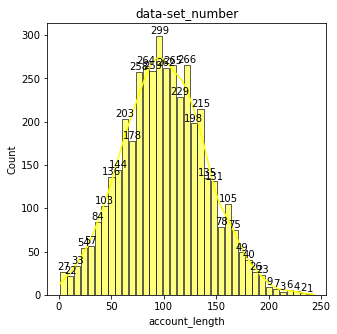

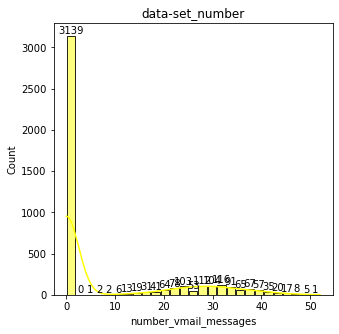

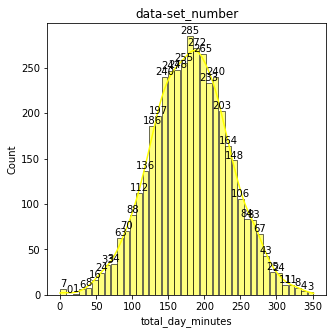

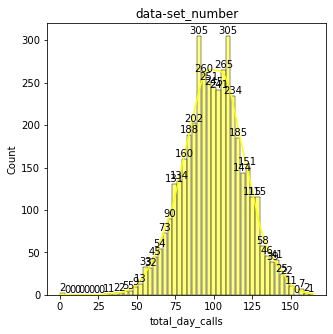

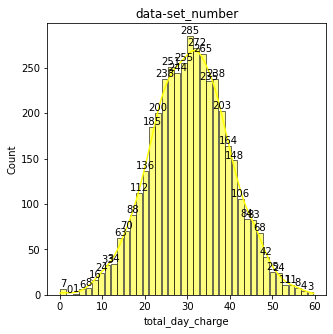

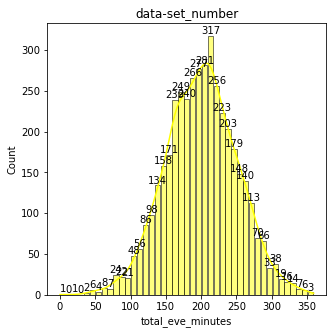

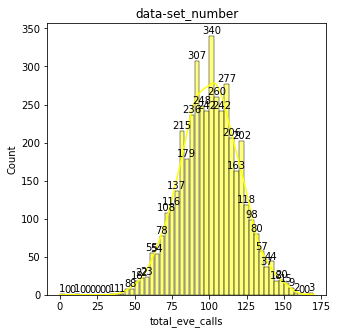

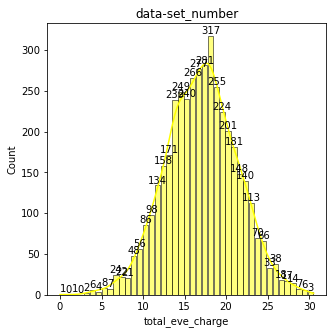

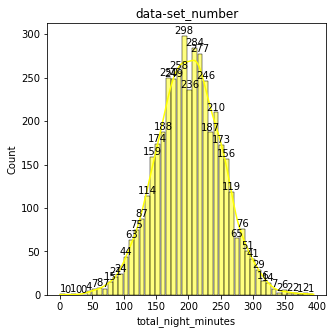

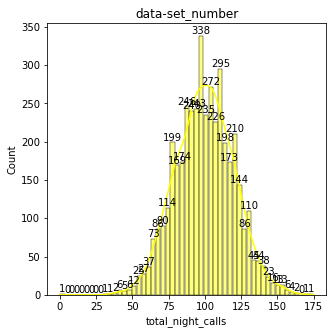

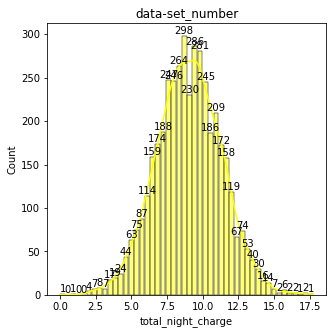

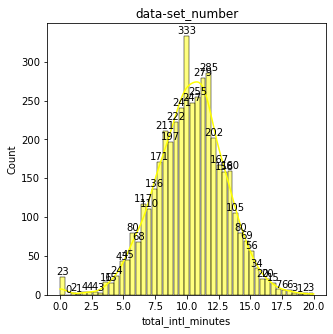

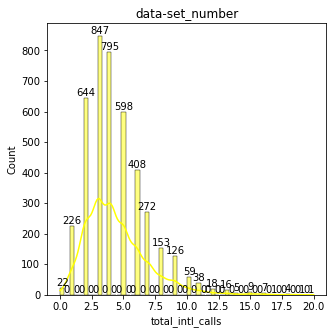

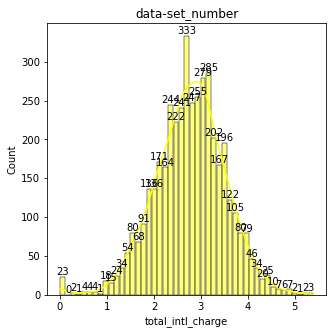

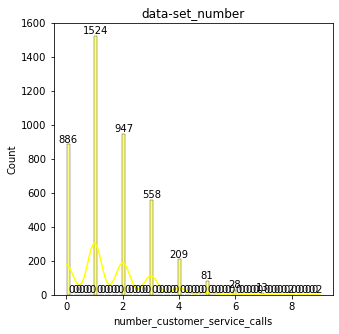

In [13]:
# Preku plot-ot gledam kakva distribucija imam na numerickite koloni

numeric_columns = df.select_dtypes('number').columns
for i in numeric_columns:
    plt.figure(figsize=(5,5))
    y=sns.histplot(x=i, data=df, shrink=.9,stat='count',kde = True,color='yellow',)
    y.bar_label(y.containers[0])
    plt.title('data-set_number')
    plt.xlabel(i)
    plt.show()

In [14]:
# Tuka pravam sqrt transformacija na 'number_vmail_messages' kolonata so cel distribucijata stane normalna

df['sqrt_number_vmail_messages'] = np.sqrt(df['number_vmail_messages'] + np.finfo(float).eps)

In [ ]:
# Tuka definiram razlicni plotovi so cel da vidime sto imame vizuelno od podatocite vo data-setot.

<AxesSubplot:xlabel='area_code', ylabel='count'>

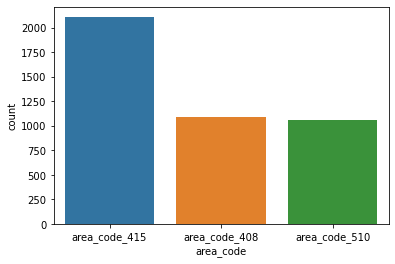

In [15]:
sns.countplot(x=df['area_code'])

<AxesSubplot:ylabel='international_plan'>

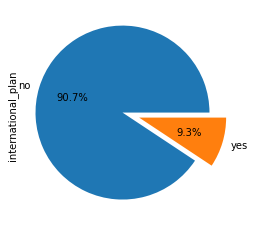

In [16]:
data = df['international_plan'].value_counts()
explode = (0.1,0.1)
data.plot (kind='pie',autopct = "%0.1f%%",explode =explode)

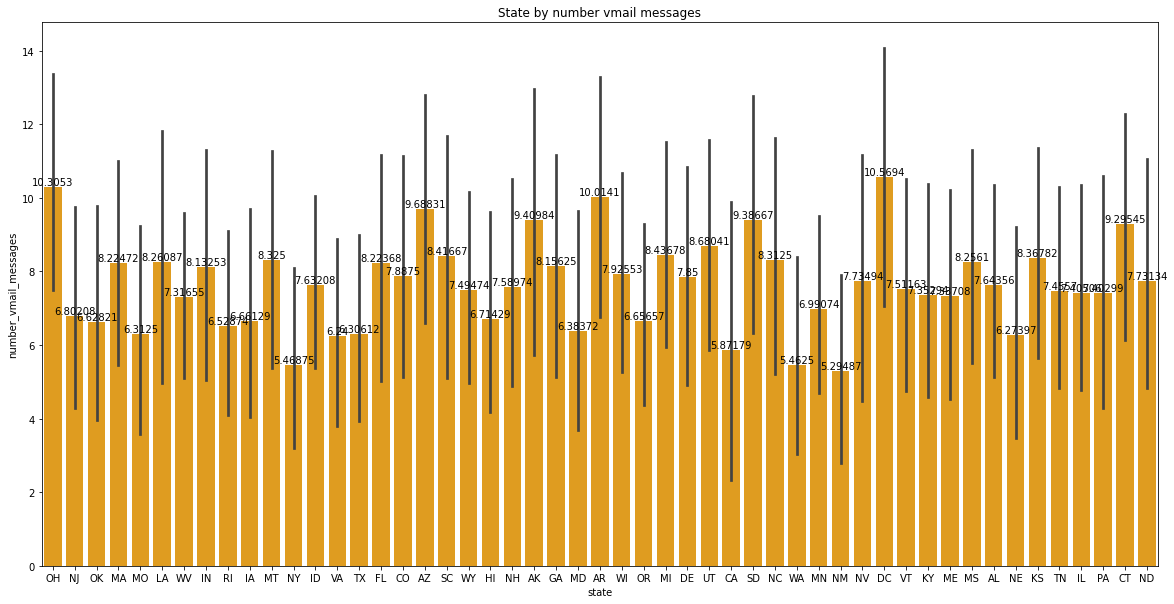

In [17]:
plt.figure(figsize=(20,10))
y= sns.barplot(data=df, x = 'state', y='number_vmail_messages',color = 'orange')
y.bar_label(y.containers[0])
plt.title('State by number vmail messages')
plt.show()

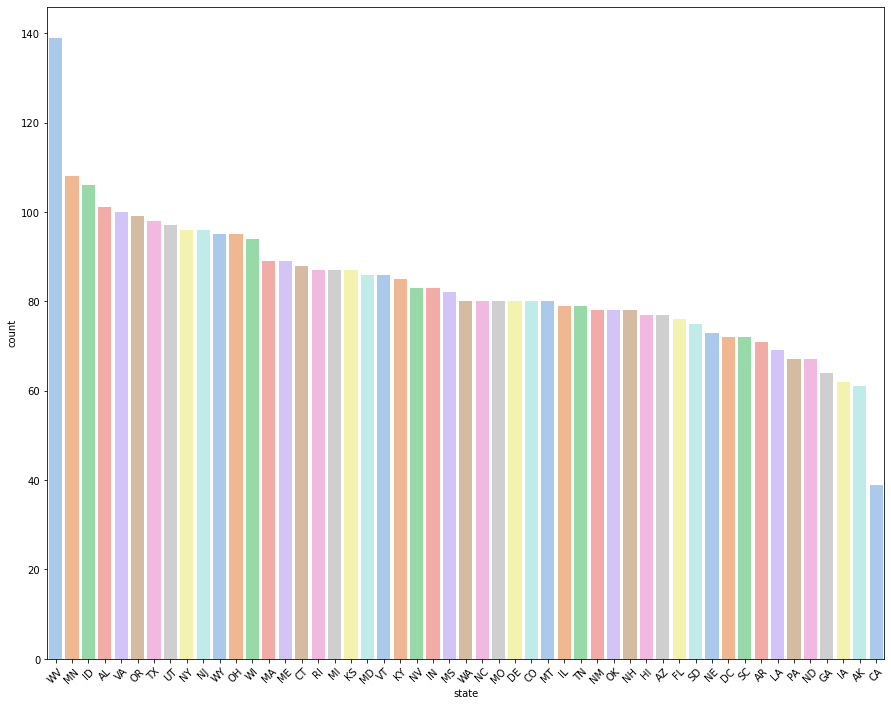

In [18]:
plt.figure(figsize=(15,12))
sns.countplot(x='state',data=df,palette='pastel',order=df['state'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

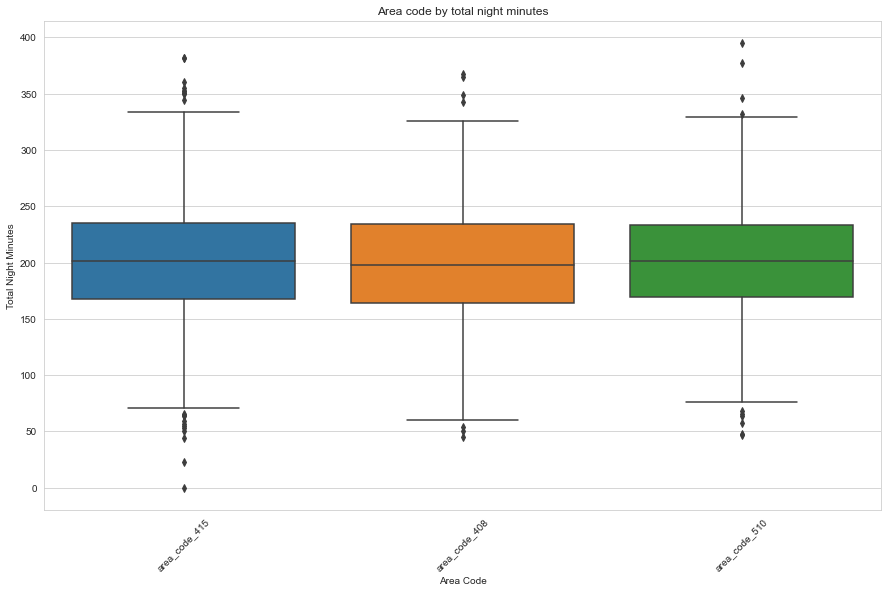

In [19]:
plt.figure(figsize=(15,9))
sns.set_style("whitegrid")
sns.boxplot(x='area_code', y='total_night_minutes',data=df)
plt.title('Area code by total night minutes')
plt.xlabel('Area Code')
plt.ylabel('Total Night Minutes')
plt.xticks(rotation=45)
plt.show()

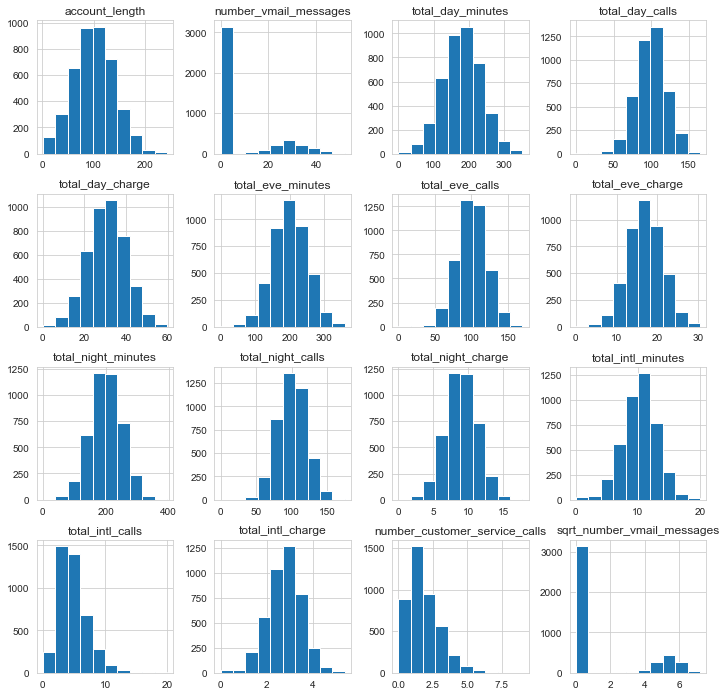

In [20]:
df.hist(figsize=(12,12),bins=10)
plt.show()

In [21]:
t_states = df['state'].value_counts().nlargest(10)
t_states

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
Name: state, dtype: int64

# Catboost Encoding , Count Encoding, Target Encoding, One-Hot Encoding

In [22]:
# Tuka ja encodir-am target kolonata charn, so LABEL ENCODER.

label_encoder = preprocessing.LabelEncoder()
df['churn']= label_encoder.fit_transform(df['churn'])
df['churn'].unique()

array([0, 1])

In [23]:
object_columns = df.select_dtypes('object').columns
print (object_columns)

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')


In [24]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,sqrt_number_vmail_messages
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,5.099020e+00
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1.490116e-08
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.490116e-08
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.490116e-08
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,0,4.898979e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,...,20.72,213.7,79,9.62,10.3,6,2.78,0,0,1.490116e-08
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,...,11.15,186.2,89,8.38,11.5,6,3.11,3,0,1.490116e-08
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,...,16.41,129.1,104,5.81,6.9,7,1.86,1,0,1.490116e-08
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,18.96,297.5,116,13.39,9.9,5,2.67,2,0,6.324555e+00


In [25]:
# Definiranje na target/label kolona i koloni atrubuti vo data setot
# atrubut ni e X
# labela/target kolona ni e y

label_column = 'churn'

X = df.drop(columns=[label_column])
y = df[label_column]

## COUNT ENCODER - DECISION TREE

In [26]:
# Train/test split, with train (70%) and test (30%), random state = 0 , for COUNT ENCODER

X_train_C, X_test_C, y_train_C, y_test_C = train_test_split( X, y, test_size=0.30,stratify = y, random_state=0)

In [27]:
X_train_C

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,MA,85,area_code_415,no,no,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,VT,93,area_code_408,no,no,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,WY,171,area_code_415,no,no,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,IN,166,area_code_510,no,no,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,WV,70,area_code_510,no,yes,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TX,208,area_code_510,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,FL,101,area_code_408,no,no,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,NV,115,area_code_415,no,no,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,IN,68,area_code_510,no,no,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [28]:
X_test_C

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,UT,73,area_code_415,no,no,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,MA,102,area_code_415,no,yes,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,OH,63,area_code_415,yes,yes,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,DC,99,area_code_415,no,yes,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,OR,101,area_code_415,no,no,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MA,160,area_code_408,no,no,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,NE,90,area_code_415,no,no,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,HI,105,area_code_510,no,no,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,GA,73,area_code_408,no,no,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [29]:
# Definirame Count Encoder na site object koloni

encoder_C = ce.CountEncoder(cols=object_columns)

X_train_C[object_columns] = encoder_C.fit_transform(X_train_C[object_columns])
X_test_C[object_columns] = encoder_C.transform(X_test_C[object_columns])

In [30]:
X_train_C

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,57,85,1482,2703,2204,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,57,93,760,2703,2204,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,75,171,1482,2703,2204,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,53,166,733,2703,2204,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,96,70,733,2703,771,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,66,208,733,2703,2204,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,49,101,760,2703,2204,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,60,115,1482,2703,2204,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,53,68,733,2703,2204,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [31]:
X_test_C

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,74,73,1482,2703,2204,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,57,102,1482,2703,771,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,65,63,1482,272,771,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,52,99,1482,2703,771,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,73,101,1482,2703,2204,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,57,160,760,2703,2204,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,52,90,1482,2703,2204,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,55,105,733,2703,2204,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,47,73,760,2703,2204,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [32]:
# Tuka gi skalirame vrednostite min/max spored Count Encoderot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal_C = minmax_scaler.fit_transform(X_train_C)
X_test_scal_C = minmax_scaler.transform(X_test_C)

In [33]:
X_train_scal_C

array([[0.46575342, 0.34710744, 1.        , ..., 0.47037037, 0.11111111,
        0.        ],
       [0.46575342, 0.38016529, 0.03604806, ..., 0.71481481, 0.        ,
        0.        ],
       [0.71232877, 0.70247934, 1.        , ..., 0.61481481, 0.11111111,
        0.        ],
       ...,
       [0.50684932, 0.47107438, 1.        , ..., 0.37592593, 0.22222222,
        0.        ],
       [0.4109589 , 0.2768595 , 0.        , ..., 0.44444444, 0.22222222,
        0.        ],
       [0.57534247, 0.59504132, 0.03604806, ..., 0.46481481, 0.22222222,
        0.        ]])

In [34]:
X_test_scal_C

array([[0.69863014, 0.29752066, 1.        , ..., 0.9       , 0.11111111,
        0.        ],
       [0.46575342, 0.41735537, 1.        , ..., 0.31481481, 0.33333333,
        0.77211   ],
       [0.57534247, 0.25619835, 1.        , ..., 0.55      , 0.11111111,
        0.83205029],
       ...,
       [0.43835616, 0.42975207, 0.        , ..., 0.65      , 0.11111111,
        0.        ],
       [0.32876712, 0.29752066, 0.03604806, ..., 0.45555556, 0.11111111,
        0.        ],
       [0.47945205, 0.17355372, 1.        , ..., 0.53518519, 0.33333333,
        0.        ]])

In [35]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - COUNT Encoder

report_log_final_table_C = []

In [36]:
# Tuka definirame DECISION TREE spored dobienite skalirani podatoci od COUNT encoderot

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scal_C,y_train_C)
predict_DT = clf.predict(X_test_scal_C)
score = accuracy_score(y_test_C,predict_DT)
report_log_final_table_C.append(('DECISION TREE - Count Encoder is:',score))
print('Score for DT - Count is:', score)

Score for DT - Count is: 0.923921568627451


## COUNT ENCODER - SVM

In [37]:
# Tuka definirame SVM spored dobienite skalirani podatoci od COUNT encoderot

clf_svm = svm.SVC()
clf_svm.fit(X_train_scal_C,y_train_C)
predict_SVM = clf_svm.predict(X_test_scal_C)
score = accuracy_score(y_test_C,predict_SVM)
report_log_final_table_C.append(('SVM - Count Encoder is:',score))
print('Score for SVM - Count is:', score)

Score for SVM - Count is: 0.9027450980392157


## COUNT ENCODER - ADABOOST

In [38]:
# Tuka definirame AdaBoost spored dobienite skalirani podatoci od COUNT encoderot

clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train_scal_C,y_train_C)
predict_ADA = clf_ada.predict(X_test_scal_C)
score = accuracy_score(y_test_C,predict_ADA)
report_log_final_table_C.append(('ADA BOOST - Count Encoder is:',score))
print('Score for Ada Boost - Count is:', score)

Score for Ada Boost - Count is: 0.8823529411764706


## COUNT ENCODER - RANDOM FOREST

In [39]:
# Tuka definirame RANDOM FOREST spored dobienite skalirani podatoci od COUNT encoderot

clf = RandomForestClassifier()
clf.fit(X_train_scal_C,y_train_C)
predict_RF = clf.predict(X_test_scal_C)
score = accuracy_score(y_test_C, predict_RF)
report_log_final_table_C.append(('RANDOM FOREST - Count Encoder is:',score))
print('Score for Random Forest - Count is:', score)

Score for Random Forest - Count is: 0.9631372549019608


## COUNT ENCODER - PRECISION, RECALL, F1 (DT, SVM, ADABOOST, RANDOM FOREST)

## PRECISION DT, SVM, ADA, RF - COUNT

In [40]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - COUNT Encoder - PRECISION

report_log_final_table_PrecisionC = []

In [41]:
# Precision - DT

scoreDT1=precision_score(y_test_C, predict_DT,average='macro')
scoreDT2=precision_score(y_test_C, predict_DT,average='micro')
scoreDT3=precision_score(y_test_C, predict_DT,average='weighted')
print('Macro Precision DT - Count:',scoreDT1,'\nMicro Precision DT - Count:',scoreDT2,'\nWeighted Precision DT-Count:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionC.append(('PRECISION - Count Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Precision - SVM

scoreSVM1=precision_score(y_test_C, predict_SVM,average='macro')
scoreSVM2=precision_score(y_test_C, predict_SVM,average='micro')
scoreSVM3=precision_score(y_test_C, predict_SVM,average='weighted')
print('Macro Precision SVM- Count:',scoreSVM1,'\nMicro Precision SVM-Count:',scoreSVM2,'\nWeighted Precision SVM-Count:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionC.append(('PRECISION - Count Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Precision - AdaBoost

scoreADA1=precision_score(y_test_C, predict_ADA,average='macro')
scoreADA2=precision_score(y_test_C, predict_ADA,average='micro')
scoreADA3=precision_score(y_test_C, predict_ADA,average='weighted')
print('Macro Precision ADA- Count:',scoreADA1,'\nMicro Precision ADA- Count:',scoreADA2,'\nWeighted Precision ADA-Count:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionC.append(('PRECISION - Count Encoder - ADA BOOST is:',scoreADA1,scoreADA2,scoreADA3))

# Precision - Random Forest

scoreRF1=precision_score(y_test_C, predict_RF,average='macro')
scoreRF2=precision_score(y_test_C, predict_RF,average='micro')
scoreRF3=precision_score(y_test_C, predict_RF,average='weighted')
print('Macro Precision RF-Count:',scoreRF1,'\nMicro Precision RF-Count:',scoreRF2,'\nWeighted Precision RF-Count:',scoreRF3)
report_log_final_table_PrecisionC.append(('PRECISION - Count Encoder - RANDOM FOREST is:',scoreRF1,scoreRF2,scoreRF3))

Macro Precision DT - Count: 0.8456139703556895 
Micro Precision DT - Count: 0.923921568627451 
Weighted Precision DT-Count: 0.9227440107587025
--------------------------------------------------------------------
Macro Precision SVM- Count: 0.9328863737734165 
Micro Precision SVM-Count: 0.9027450980392157 
Weighted Precision SVM-Count: 0.9089973937835616
--------------------------------------------------------------------
Macro Precision ADA- Count: 0.7661972454718569 
Micro Precision ADA- Count: 0.8823529411764706 
Weighted Precision ADA-Count: 0.8685169121011852
--------------------------------------------------------------------
Macro Precision RF-Count: 0.9697812703147107 
Micro Precision RF-Count: 0.9631372549019608 
Weighted Precision RF-Count: 0.9636826095204248


## RECALL DT, SVM, ADA, RF - COUNT

In [42]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - COUNT Encoder - RECALL

report_log_final_table_RecallC = []

In [43]:
# Recall - DT

scoreDT1=recall_score(y_test_C, predict_DT,average='macro')
scoreDT2=recall_score(y_test_C, predict_DT,average='micro')
scoreDT3=recall_score(y_test_C, predict_DT,average='weighted')
print('Macro RECALL DT - Count:',scoreDT1,'\nMicro RECALL DT - Count:',scoreDT2,'\nWeighted RECALL DT-Count:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallC.append(('RECALL - Count Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Recall - SVM

scoreSVM1=recall_score(y_test_C, predict_SVM,average='macro')
scoreSVM2=recall_score(y_test_C, predict_SVM,average='micro')
scoreSVM3=recall_score(y_test_C, predict_SVM,average='weighted')
print('Macro RECALL SVM - Count:',scoreSVM1,'\nMicro RECALL SVM - Count:',scoreSVM2,'\nWeighted RECALL SVM-Count:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallC.append(('RECALL - Count Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Recall - AdaBoost

scoreADA1=recall_score(y_test_C, predict_ADA,average='macro')
scoreADA2=recall_score(y_test_C, predict_ADA,average='micro')
scoreADA3=recall_score(y_test_C, predict_ADA,average='weighted')
print('Macro RECALL ADA - Count:',scoreADA1,'\nMicro RECALL ADA - Count:',scoreADA2,'\nWeighted RECALL ADA-Count:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallC.append(('RECALL - Count Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# Recall - Random Forest

scoreRF1=recall_score(y_test_C, predict_RF,average='macro')
scoreRF2=recall_score(y_test_C, predict_RF,average='micro')
scoreRF3=recall_score(y_test_C, predict_RF,average='weighted')
print('Macro RECALL RF - Count:',scoreRF1,'\nMicro RECALL RF - Count:',scoreRF2,'\nWeighted RECALL RF-Count:',scoreRF3)
report_log_final_table_RecallC.append(('RECALL - Count Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro RECALL DT - Count: 0.8342194062716632 
Micro RECALL DT - Count: 0.923921568627451 
Weighted RECALL DT-Count: 0.923921568627451
--------------------------------------------------------------------
Macro RECALL SVM - Count: 0.658305468335848 
Micro RECALL SVM - Count: 0.9027450980392157 
Weighted RECALL SVM-Count: 0.9027450980392157
--------------------------------------------------------------------
Macro RECALL ADA - Count: 0.6838376218244098 
Micro RECALL ADA - Count: 0.8823529411764706 
Weighted RECALL ADA-Count: 0.8823529411764706
--------------------------------------------------------------------
Macro RECALL RF - Count: 0.875726358928353 
Micro RECALL RF - Count: 0.9631372549019608 
Weighted RECALL RF-Count: 0.9631372549019608


## F1 DT, SVM, ADA, RF - COUNT

In [44]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - COUNT Encoder - F1

report_log_final_table_F1C = []

In [45]:
# F1 - DT

scoreDT1=f1_score(y_test_C, predict_DT,average='macro')
scoreDT2=f1_score(y_test_C, predict_DT,average='micro')
scoreDT3=f1_score(y_test_C, predict_DT,average='weighted')
print('Macro F1 DT - Count:',scoreDT1,'\nMicro F1 DT - Count:',scoreDT2,'\nWeighted F1 DT-Count:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_F1C.append(('F1 - Count Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# F1 - DT

scoreSVM1=f1_score(y_test_C, predict_SVM,average='macro')
scoreSVM2=f1_score(y_test_C, predict_SVM,average='micro')
scoreSVM3=f1_score(y_test_C, predict_SVM,average='weighted')
print('Macro F1 SVM - Count:',scoreSVM1,'\nMicro F1 SVM - Count:',scoreSVM2,'\nWeighted F1 SVM-Count:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_F1C.append(('F1 - Count Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# F1 - DT

scoreADA1=f1_score(y_test_C, predict_ADA,average='macro')
scoreADA2=f1_score(y_test_C, predict_ADA,average='micro')
scoreADA3=f1_score(y_test_C, predict_ADA,average='weighted')
print('Macro F1 ADA - Count:',scoreADA1,'\nMicro F1 ADA - Count:',scoreADA2,'\nWeighted F1 ADA-Count:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_F1C.append(('F1 - Count Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# F1 - DT

scoreRF1=f1_score(y_test_C, predict_RF,average='macro')
scoreRF2=f1_score(y_test_C, predict_RF,average='micro')
scoreRF3=f1_score(y_test_C, predict_RF,average='weighted')
print('Macro F1 RF - Count:',scoreRF1,'\nMicro F1 RF - Count:',scoreRF2,'\nWeighted F1 RF-Count:',scoreRF3)
report_log_final_table_F1C.append(('F1 - Count Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro F1 DT - Count: 0.8397678820598329 
Micro F1 DT - Count: 0.923921568627451 
Weighted F1 DT-Count: 0.9232840406989085
--------------------------------------------------------------------
Macro F1 SVM - Count: 0.712679189322788 
Micro F1 SVM - Count: 0.9027450980392157 
Weighted F1 SVM-Count: 0.8807509716689442
--------------------------------------------------------------------
Macro F1 ADA - Count: 0.7133474423847095 
Micro F1 ADA - Count: 0.8823529411764706 
Weighted F1 ADA-Count: 0.8716498350221407
--------------------------------------------------------------------
Macro F1 RF - Count: 0.9153435490866145 
Micro F1 RF - Count: 0.9631372549019608 
Weighted F1 RF-Count: 0.9610918040267737


## TARGET ENCODER - DECISION TREE

In [46]:
# Train/test split, with train (70%) and test (30%), random state = 0 for TARGET ENCODER

X_train_T, X_test_T, y_train_T, y_test_T = train_test_split( X, y, test_size=0.30,stratify = y, random_state=0)

In [47]:
X_train_T

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,MA,85,area_code_415,no,no,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,VT,93,area_code_408,no,no,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,WY,171,area_code_415,no,no,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,IN,166,area_code_510,no,no,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,WV,70,area_code_510,no,yes,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TX,208,area_code_510,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,FL,101,area_code_408,no,no,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,NV,115,area_code_415,no,no,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,IN,68,area_code_510,no,no,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [48]:
X_test_T

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,UT,73,area_code_415,no,no,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,MA,102,area_code_415,no,yes,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,OH,63,area_code_415,yes,yes,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,DC,99,area_code_415,no,yes,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,OR,101,area_code_415,no,no,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MA,160,area_code_408,no,no,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,NE,90,area_code_415,no,no,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,HI,105,area_code_510,no,no,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,GA,73,area_code_408,no,no,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [49]:
# Definirame Target Encoder na site object koloni

encoder_T = ce.TargetEncoder(cols=object_columns)
X_train_T[object_columns] = encoder_T.fit_transform(X_train_T[object_columns],y_train_T)
X_test_T[object_columns] = encoder_T.transform(X_test_T[object_columns],y_test_T)

In [50]:
X_train_T

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,0.157483,85,0.134278,0.113208,0.162886,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,0.140363,93,0.140789,0.113208,0.162886,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,0.080248,171,0.134278,0.113208,0.162886,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,0.241568,166,0.154161,0.113208,0.162886,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,0.145831,70,0.154161,0.113208,0.077821,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.241413,208,0.154161,0.113208,0.162886,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,0.104064,101,0.140789,0.113208,0.162886,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,0.166202,115,0.134278,0.113208,0.162886,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,0.241568,68,0.154161,0.113208,0.162886,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [51]:
X_test_T

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,0.121708,73,0.134278,0.113208,0.162886,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,0.157483,102,0.134278,0.113208,0.077821,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,0.138488,63,0.134278,0.415441,0.077821,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,0.134859,99,0.134278,0.113208,0.077821,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,0.150636,101,0.134278,0.113208,0.162886,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.157483,160,0.140789,0.113208,0.162886,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,0.060949,90,0.134278,0.113208,0.162886,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,0.039426,105,0.154161,0.113208,0.162886,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,0.088616,73,0.140789,0.113208,0.162886,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [52]:
# Tuka gi skalirame vrednostite min/max spored Target Encoderot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal_T = minmax_scaler.fit_transform(X_train_T)
X_test_scal_T = minmax_scaler.transform(X_test_T)

In [53]:
X_train_scal_T

array([[0.4400493 , 0.34710744, 0.        , ..., 0.47037037, 0.11111111,
        0.        ],
       [0.38207148, 0.38016529, 0.3274897 , ..., 0.71481481, 0.        ,
        0.        ],
       [0.17849543, 0.70247934, 0.        , ..., 0.61481481, 0.11111111,
        0.        ],
       ...,
       [0.46957528, 0.47107438, 0.        , ..., 0.37592593, 0.22222222,
        0.        ],
       [0.72479679, 0.2768595 , 1.        , ..., 0.44444444, 0.22222222,
        0.        ],
       [0.37572186, 0.59504132, 0.3274897 , ..., 0.46481481, 0.22222222,
        0.        ]])

In [54]:
X_test_scal_T

array([[0.31889861, 0.29752066, 0.        , ..., 0.9       , 0.11111111,
        0.        ],
       [0.4400493 , 0.41735537, 0.        , ..., 0.31481481, 0.33333333,
        0.77211   ],
       [0.37572186, 0.25619835, 0.        , ..., 0.55      , 0.11111111,
        0.83205029],
       ...,
       [0.0402557 , 0.42975207, 1.        , ..., 0.65      , 0.11111111,
        0.        ],
       [0.20683488, 0.29752066, 0.3274897 , ..., 0.45555556, 0.11111111,
        0.        ],
       [0.54538038, 0.17355372, 0.        , ..., 0.53518519, 0.33333333,
        0.        ]])

In [55]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - TARGET Encoder

report_log_final_table_T = []

In [56]:
# Tuka definirame DECISION TREE spored dobienite skalirani podatoci od TARGET encoderot

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scal_T,y_train_T)
predict_DT = clf.predict(X_test_scal_T)
score = accuracy_score(y_test_T,predict_DT)
report_log_final_table_T.append(('DECISION TREE - Target Encoder is:',score))
print('Score for DT - Target is:', score)

Score for DT - Target is: 0.9176470588235294


## TARGET ENCODER - SVM

In [57]:
# Tuka definirame SVM spored dobienite skalirani podatoci od TARGET encoderot

clf_svm = svm.SVC()
clf_svm.fit(X_train_scal_T,y_train_T)
predict_SVM = clf_svm.predict(X_test_scal_T)
score = accuracy_score(y_test_T,predict_SVM)
report_log_final_table_T.append(('SVM - Target Encoder is:',score))
print('Score for SVM - Target is:', score)

Score for SVM - Target is: 0.8988235294117647


## TARGET ENCODER - ADABOOST

In [58]:
# Tuka definirame AdaBoost spored dobienite skalirani podatoci od TARGET encoderot

clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train_scal_T,y_train_T)
predict_ADA = clf_ada.predict(X_test_scal_T)
score = accuracy_score(y_test_T,predict_ADA)
report_log_final_table_T.append(('ADA BOOST - Target Encoder is:',score))
print('Score for ADA BOOST - Target is:', score)

Score for ADA BOOST - Target is: 0.8862745098039215


## TARGET ENCODER - RANDOM FOREST

In [59]:
# Tuka definirame RANDOM FOREST spored dobienite skalirani podatoci od TARGET encoderot

clf = RandomForestClassifier()
clf.fit(X_train_scal_T,y_train_T)
predict_RF = clf.predict(X_test_scal_T)
score = accuracy_score(y_test_T, predict_RF)
report_log_final_table_T.append(('RANDOM FOREST- Target Encoder is:',score))
print('Score for RANDOM FOREST - Target is:', score)

Score for RANDOM FOREST - Target is: 0.9592156862745098


## TARGET ENCODER - PRECISION, RECALL, F1 (DT, SVM, ADABOOST, RANDOM FOREST)

## PRECISION DT, SVM, ADA, RF - TARGET

In [60]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - TARGET Encoder - Precision

report_log_final_table_PrecisionT = []

In [61]:
# Precision - DT

scoreDT1=precision_score(y_test_T, predict_DT,average='macro')
scoreDT2=precision_score(y_test_T, predict_DT,average='micro')
scoreDT3=precision_score(y_test_T, predict_DT,average='weighted')
print('Macro Precision DT - Target:',scoreDT1,'\nMicro Precision DT - Target:',scoreDT2,'\nWeighted Precision DT-Target:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionT.append(('PRECISION - Target Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Precision - SVM

scoreSVM1=precision_score(y_test_T, predict_SVM,average='macro')
scoreSVM2=precision_score(y_test_T, predict_SVM,average='micro')
scoreSVM3=precision_score(y_test_T, predict_SVM,average='weighted')
print('Macro Precision SVM- Target:',scoreSVM1,'\nMicro Precision SVM-Target:',scoreSVM2,'\nWeighted Precision SVM-Target:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionT.append(('PRECISION - Target Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Precision - AdaBoost

scoreADA1=precision_score(y_test_T, predict_ADA,average='macro')
scoreADA2=precision_score(y_test_T, predict_ADA,average='micro')
scoreADA3=precision_score(y_test_T, predict_ADA,average='weighted')
print('Macro Precision ADA- Target:',scoreADA1,'\nMicro Precision ADA- Target:',scoreADA2,'\nWeighted Precision ADA-Target:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionT.append(('PRECISION - Target Encoder - ADA BOOST is:',scoreADA1,scoreADA2,scoreADA3))

# Precision - Random Forest

scoreRF1=precision_score(y_test_T, predict_RF,average='macro')
scoreRF2=precision_score(y_test_T, predict_RF,average='micro')
scoreRF3=precision_score(y_test_T, predict_RF,average='weighted')
print('Macro Precision RF-Target:',scoreRF1,'\nMicro Precision RF-Target:',scoreRF2,'\nWeighted Precision RF-Target:',scoreRF3)
report_log_final_table_PrecisionT.append(('PRECISION - Target Encoder - RANDOM FOREST is:',scoreRF1,scoreRF2,scoreRF3))

Macro Precision DT - Target: 0.8283180680252958 
Micro Precision DT - Target: 0.9176470588235294 
Weighted Precision DT-Target: 0.9182353946575462
--------------------------------------------------------------------
Macro Precision SVM- Target: 0.8841135045567523 
Micro Precision SVM-Target: 0.8988235294117647 
Weighted Precision SVM-Target: 0.8959564306252742
--------------------------------------------------------------------
Macro Precision ADA- Target: 0.7766774891774892 
Micro Precision ADA- Target: 0.8862745098039215 
Weighted Precision ADA-Target: 0.8737793905440965
--------------------------------------------------------------------
Macro Precision RF-Target: 0.9705132653605936 
Micro Precision RF-Target: 0.9592156862745098 
Weighted Precision RF-Target: 0.9602863354277813


## RECALL DT, SVM, ADA, RF - TARGET

In [62]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - TARGET Encoder - Recall

report_log_final_table_RecallT = []

In [63]:
# Racall - DT

scoreDT1=recall_score(y_test_T, predict_DT,average='macro')
scoreDT2=recall_score(y_test_T, predict_DT,average='micro')
scoreDT3=recall_score(y_test_T, predict_DT,average='weighted')
print('Macro RECALL DT - Target:',scoreDT1,'\nMicro RECALL DT - Target:',scoreDT2,'\nWeighted RECALL DT-Target:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallT.append(('RECALL - Target Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Racall - SVM

scoreSVM1=recall_score(y_test_T, predict_SVM,average='macro')
scoreSVM2=recall_score(y_test_T, predict_SVM,average='micro')
scoreSVM3=recall_score(y_test_T, predict_SVM,average='weighted')
print('Macro RECALL SVM - Target:',scoreSVM1,'\nMicro RECALL SVM - Target:',scoreSVM2,'\nWeighted RECALL SVM-Target:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallT.append(('RECALL - Target Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Racall - AdaBoost

scoreADA1=recall_score(y_test_T, predict_ADA,average='macro')
scoreADA2=recall_score(y_test_T, predict_ADA,average='micro')
scoreADA3=recall_score(y_test_T, predict_ADA,average='weighted')
print('Macro RECALL ADA - Target:',scoreADA1,'\nMicro RECALL ADA - Target:',scoreADA2,'\nWeighted RECALL ADA-Target:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallT.append(('RECALL - Target Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# Racall - Random Forest

scoreRF1=recall_score(y_test_T, predict_RF,average='macro')
scoreRF2=recall_score(y_test_T, predict_RF,average='micro')
scoreRF3=recall_score(y_test_T, predict_RF,average='weighted')
print('Macro RECALL RF - Target:',scoreRF1,'\nMicro RECALL RF - Target:',scoreRF2,'\nWeighted RECALL RF-Target:',scoreRF3)
report_log_final_table_RecallT.append(('RECALL - Target Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro RECALL DT - Target: 0.8329068629449905 
Micro RECALL DT - Target: 0.9176470588235294 
Weighted RECALL DT-Target: 0.9176470588235294
--------------------------------------------------------------------
Macro RECALL SVM - Target: 0.6606986298576846 
Micro RECALL SVM - Target: 0.8988235294117647 
Weighted RECALL SVM-Target: 0.8988235294117647
--------------------------------------------------------------------
Macro RECALL ADA - Target: 0.6954670105615137 
Micro RECALL ADA - Target: 0.8862745098039215 
Weighted RECALL ADA-Target: 0.8862745098039215
--------------------------------------------------------------------
Macro RECALL RF - Target: 0.8594227867716022 
Micro RECALL RF - Target: 0.9592156862745098 
Weighted RECALL RF-Target: 0.9592156862745098


## F1 DT, SVM, ADA, RF - TARGET

In [64]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - TARGET Encoder - F1

report_log_final_table_F1T = []

In [65]:
# F1 - DT

scoreDT1=f1_score(y_test_T, predict_DT,average='macro')
scoreDT2=f1_score(y_test_T, predict_DT,average='micro')
scoreDT3=f1_score(y_test_T, predict_DT,average='weighted')
print('Macro F1 DT - Target:',scoreDT1,'\nMicro F1 DT - Target:',scoreDT2,'\nWeighted F1 DT-Target:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_F1T.append(('F1 - Target Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# F1 - SVM

scoreSVM1=f1_score(y_test_T, predict_SVM,average='macro')
scoreSVM2=f1_score(y_test_T, predict_SVM,average='micro')
scoreSVM3=f1_score(y_test_T, predict_SVM,average='weighted')
print('Macro F1 SVM - Target:',scoreSVM1,'\nMicro F1 SVM - Target:',scoreSVM2,'\nWeighted F1 SVM-Target:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_F1T.append(('F1 - Target Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# F1 - AdaBoost

scoreADA1=f1_score(y_test_T, predict_ADA,average='macro')
scoreADA2=f1_score(y_test_T, predict_ADA,average='micro')
scoreADA3=f1_score(y_test_T, predict_ADA,average='weighted')
print('Macro F1 ADA - Target:',scoreADA1,'\nMicro F1 ADA - Target:',scoreADA2,'\nWeighted F1 ADA-Target:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_F1T.append(('F1 - Target Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# F1 - Random Forest

scoreRF1=f1_score(y_test_T, predict_RF,average='macro')
scoreRF2=f1_score(y_test_T, predict_RF,average='micro')
scoreRF3=f1_score(y_test_T, predict_RF,average='weighted')
print('Macro F1 RF - Target:',scoreRF1,'\nMicro F1 RF - Target:',scoreRF2,'\nWeighted F1 RF-Target:',scoreRF3)
report_log_final_table_F1T.append(('F1 - Target Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro F1 DT - Target: 0.8305870829848057 
Micro F1 DT - Target: 0.9176470588235294 
Weighted F1 DT-Target: 0.917932813667639
--------------------------------------------------------------------
Macro F1 SVM - Target: 0.7108594493012986 
Micro F1 SVM - Target: 0.8988235294117647 
Weighted F1 SVM-Target: 0.8785277970262962
--------------------------------------------------------------------
Macro F1 ADA - Target: 0.7253171760154165 
Micro F1 ADA - Target: 0.8862745098039215 
Weighted F1 ADA-Target: 0.8765445070441655
--------------------------------------------------------------------
Macro F1 RF - Target: 0.9045218894009217 
Micro F1 RF - Target: 0.9592156862745098 
Weighted F1 RF-Target: 0.9564951658082589


## CATBOOST ENCODER - DECISION TREE

In [66]:
# Train/test split, with train (70%) and test (30%), random state = 0, for CATBOOST encoder

X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split( X, y, test_size=0.30,stratify = y, random_state=0)

In [67]:
X_train_CB

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,MA,85,area_code_415,no,no,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,VT,93,area_code_408,no,no,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,WY,171,area_code_415,no,no,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,IN,166,area_code_510,no,no,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,WV,70,area_code_510,no,yes,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TX,208,area_code_510,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,FL,101,area_code_408,no,no,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,NV,115,area_code_415,no,no,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,IN,68,area_code_510,no,no,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [68]:
X_test_CB

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,UT,73,area_code_415,no,no,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,MA,102,area_code_415,no,yes,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,OH,63,area_code_415,yes,yes,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,DC,99,area_code_415,no,yes,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,OR,101,area_code_415,no,no,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MA,160,area_code_408,no,no,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,NE,90,area_code_415,no,no,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,HI,105,area_code_510,no,no,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,GA,73,area_code_408,no,no,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [69]:
# Definirame CatBoost Encoder na site object koloni

encoder_CB = ce.CatBoostEncoder(cols=object_columns)
X_train_CB[object_columns] = encoder_CB.fit_transform(X_train_CB[object_columns],y_train_CB)
X_test_CB[object_columns] = encoder_CB.transform(X_test_CB[object_columns],y_test_CB)

In [70]:
X_train_CB

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,0.140840,85,0.140840,0.140840,0.140840,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,0.140840,93,0.140840,0.070420,0.070420,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,0.140840,171,0.070420,0.046947,0.046947,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,0.140840,166,0.140840,0.035210,0.035210,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,0.140840,70,0.070420,0.028168,0.140840,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.229407,208,0.151832,0.112686,0.162337,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,0.104915,101,0.141161,0.113015,0.162717,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,0.169014,115,0.134373,0.112973,0.162643,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,0.229072,68,0.152989,0.112931,0.162570,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [71]:
X_test_CB

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,0.140840,73,0.140840,0.140840,0.140840,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,0.140840,102,0.070420,0.070420,0.140840,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,0.140840,63,0.046947,0.140840,0.070420,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,0.140840,99,0.035210,0.046947,0.046947,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,0.140840,101,0.028168,0.035210,0.070420,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.160651,160,0.138895,0.109103,0.168969,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,0.101945,90,0.141025,0.109008,0.168787,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,0.097311,105,0.142851,0.108913,0.168606,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,0.184755,73,0.138469,0.108818,0.168425,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [72]:
# Tuka gi skalirame vrednostite min/max spored CatBoost Encoderot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal_CB = minmax_scaler.fit_transform(X_train_CB)
X_test_scal_CB = minmax_scaler.transform(X_test_CB)

In [73]:
X_train_scal_CB

array([[0.24065675, 0.34710744, 0.70704514, ..., 0.47037037, 0.11111111,
        0.        ],
       [0.24065675, 0.38016529, 0.70704514, ..., 0.71481481, 0.        ,
        0.        ],
       [0.24065675, 0.70247934, 0.30301935, ..., 0.61481481, 0.11111111,
        0.        ],
       ...,
       [0.29045771, 0.47107438, 0.66993992, ..., 0.37592593, 0.22222222,
        0.        ],
       [0.39661954, 0.2768595 , 0.77674563, ..., 0.44444444, 0.22222222,
        0.        ],
       [0.24028197, 0.59504132, 0.70781655, ..., 0.46481481, 0.22222222,
        0.        ]])

In [74]:
X_test_scal_CB

array([[0.24065675, 0.29752066, 0.70704514, ..., 0.9       , 0.11111111,
        0.        ],
       [0.24065675, 0.41735537, 0.30301935, ..., 0.31481481, 0.33333333,
        0.77211   ],
       [0.24065675, 0.25619835, 0.16834408, ..., 0.55      , 0.11111111,
        0.83205029],
       ...,
       [0.16371234, 0.42975207, 0.71858046, ..., 0.65      , 0.11111111,
        0.        ],
       [0.3182827 , 0.29752066, 0.69343899, ..., 0.45555556, 0.11111111,
        0.        ],
       [0.24409881, 0.17355372, 0.70681409, ..., 0.53518519, 0.33333333,
        0.        ]])

In [75]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - CATBOOST Encoder

report_log_final_table_CB = []

In [76]:
# Tuka definirame DECISION TREE spored dobienite skalirani podatoci od CATBOOST encoderot

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scal_CB,y_train_CB)
predict_DT = clf.predict(X_test_scal_CB)
score = accuracy_score(y_test_CB,predict_DT)
report_log_final_table_CB.append(('DECISION TREE - CatBoost Encoder is:',score))
print('Score for DT - CatBoost is:', score)

Score for DT - CatBoost is: 0.8956862745098039


## CATBOOST ENCODER - SVM

In [77]:
# Tuka definirame SVM spored dobienite skalirani podatoci od CATBOOST encoderot

clf_svm = svm.SVC()
clf_svm.fit(X_train_scal_CB,y_train_CB)
predict_SVM = clf_svm.predict(X_test_scal_CB)
score = accuracy_score(y_test_CB,predict_SVM)
report_log_final_table_CB.append(('SVM - CatBoost Encoder is:',score))
print('Score for SVM - CatBoost is:', score)

Score for SVM - CatBoost is: 0.9152941176470588


## CATBOOST ENCODER - ADABOOST

In [78]:
# Tuka definirame ADABOOST spored dobienite skalirani podatoci od CATBOOST encoderot

clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train_scal_CB,y_train_CB)
predict_ADA = clf_ada.predict(X_test_scal_CB)
score = accuracy_score(y_test_CB,predict_ADA)
report_log_final_table_CB.append(('ADA BOOST - CatBoost Encoder is:',score))
print('Score for ADA BOOST - CatBoost is:', score)

Score for ADA BOOST - CatBoost is: 0.8705882352941177


## CATBOOST ENCODER - RANDOM FOREST

In [79]:
# Tuka definirame RANDOM FOREST spored dobienite skalirani podatoci od CATBOOST encoderot

clf = RandomForestClassifier()
clf.fit(X_train_scal_CB,y_train_CB)
predict_RF = clf.predict(X_test_scal_CB)
score = accuracy_score(y_test_CB, predict_RF)
report_log_final_table_CB.append(('RANDOM FOREST- CatBoost Encoder is:',score))
print('Score for RANDOM FOREST - CatBoost is:', score)

Score for RANDOM FOREST - CatBoost is: 0.9545098039215686


## CATBOOST ENCODER - PRECISION, RECALL, F1 (DT, SVM, ADABOOST, RANDOM FOREST)

## PRECISION DT, SVM, ADA, RF - CATBOOST

In [80]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - CATBOOST Encoder - Precision

report_log_final_table_PrecisionCB = []

In [81]:
# Precision - DT

scoreDT1=precision_score(y_test_CB, predict_DT,average='macro')
scoreDT2=precision_score(y_test_CB, predict_DT,average='micro')
scoreDT3=precision_score(y_test_CB, predict_DT,average='weighted')
print('Macro Precision DT - CatBoost:',scoreDT1,'\nMicro Precision DT - CatBoost:',scoreDT2,'\nWeighted Precision DT-CatBoost:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionCB.append(('PRECISION - CatBoost Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Precision - SVM

scoreSVM1=precision_score(y_test_CB, predict_SVM,average='macro')
scoreSVM2=precision_score(y_test_CB, predict_SVM,average='micro')
scoreSVM3=precision_score(y_test_CB, predict_SVM,average='weighted')
print('Macro Precision SVM- CatBoost:',scoreSVM1,'\nMicro Precision SVM-CatBoost:',scoreSVM2,'\nWeighted Precision SVM-CatBoost:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionCB.append(('PRECISION - CatBoost Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Precision - AdaBoost

scoreADA1=precision_score(y_test_CB, predict_ADA,average='macro')
scoreADA2=precision_score(y_test_CB, predict_ADA,average='micro')
scoreADA3=precision_score(y_test_CB, predict_ADA,average='weighted')
print('Macro Precision ADA- CatBoost:',scoreADA1,'\nMicro Precision ADA- CatBoost:',scoreADA2,'\nWeighted Precision ADA-CatBoost:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionCB.append(('PRECISION - CatBoost Encoder - ADA BOOST is:',scoreADA1,scoreADA2,scoreADA3))

# Precision - Random Forest

scoreRF1=precision_score(y_test_CB, predict_RF,average='macro')
scoreRF2=precision_score(y_test_CB, predict_RF,average='micro')
scoreRF3=precision_score(y_test_CB, predict_RF,average='weighted')
print('Macro Precision RF-CatBoost:',scoreRF1,'\nMicro Precision RF-CatBoost:',scoreRF2,'\nWeighted Precision RF-CatBoost:',scoreRF3)
report_log_final_table_PrecisionCB.append(('PRECISION - CatBoost Encoder - RANDOM FOREST is:',scoreRF1,scoreRF2,scoreRF3))

Macro Precision DT - CatBoost: 0.7811624649859944 
Micro Precision DT - CatBoost: 0.8956862745098039 
Weighted Precision DT-CatBoost: 0.9022908771351678
--------------------------------------------------------------------
Macro Precision SVM- CatBoost: 0.911935446418205 
Micro Precision SVM-CatBoost: 0.9152941176470588 
Weighted Precision SVM-CatBoost: 0.9147328138267963
--------------------------------------------------------------------
Macro Precision ADA- CatBoost: 0.7515938004703482 
Micro Precision ADA- CatBoost: 0.8705882352941177 
Weighted Precision ADA-CatBoost: 0.8457421151669803
--------------------------------------------------------------------
Macro Precision RF-CatBoost: 0.9546765337160765 
Micro Precision RF-CatBoost: 0.9545098039215686 
Weighted Precision RF-CatBoost: 0.9545250062417814


## RECALL DT, SVM, ADA, RF - CATBOOST

In [82]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - CATBOOST Encoder - Recall

report_log_final_table_RecallCB = []

In [83]:
# Recall - DT

scoreDT1=recall_score(y_test_CB, predict_DT,average='macro')
scoreDT2=recall_score(y_test_CB, predict_DT,average='micro')
scoreDT3=recall_score(y_test_CB, predict_DT,average='weighted')
print('Macro RECALL DT - CatBoost:',scoreDT1,'\nMicro RECALL DT - CatBoost:',scoreDT2,'\nWeighted RECALL DT-CatBoost:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallCB.append(('RECALL - CatBoost Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Recall - SVM

scoreSVM1=recall_score(y_test_CB, predict_SVM,average='macro')
scoreSVM2=recall_score(y_test_CB, predict_SVM,average='micro')
scoreSVM3=recall_score(y_test_CB, predict_SVM,average='weighted')
print('Macro RECALL SVM - CatBoost:',scoreSVM1,'\nMicro RECALL  SVM - CatBoost:',scoreSVM2,'\nWeighted RECALL  SVM-CatBoost:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallCB.append(('RECALL  - CatBoost Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Recall - AdaBoost

scoreADA1=recall_score(y_test_CB, predict_ADA,average='macro')
scoreADA2=recall_score(y_test_CB, predict_ADA,average='micro')
scoreADA3=recall_score(y_test_CB, predict_ADA,average='weighted')
print('Macro RECALL  ADA - CatBoost:',scoreADA1,'\nMicro RECALL  ADA - CatBoost:',scoreADA2,'\nWeighted RECALL  ADA-CatBoost:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallCB.append(('RECALL  - CatBoost Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# Recall - Random Forest 

scoreRF1=recall_score(y_test_CB, predict_RF,average='macro')
scoreRF2=recall_score(y_test_CB, predict_RF,average='micro')
scoreRF3=recall_score(y_test_CB, predict_RF,average='weighted')
print('Macro RECALL  RF - CatBoost:',scoreRF1,'\nMicro RECALL  RF - CatBoost:',scoreRF2,'\nWeighted RECALL  RF-CatBoost:',scoreRF3)
report_log_final_table_RecallCB.append(('RECALL  - CatBoost Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro RECALL DT - CatBoost: 0.813121865187783 
Micro RECALL DT - CatBoost: 0.8956862745098039 
Weighted RECALL DT-CatBoost: 0.8956862745098039
--------------------------------------------------------------------
Macro RECALL SVM - CatBoost: 0.7170207560249562 
Micro RECALL  SVM - CatBoost: 0.9152941176470588 
Weighted RECALL  SVM-CatBoost: 0.9152941176470588
--------------------------------------------------------------------
Macro RECALL  ADA - CatBoost: 0.5905221628675121 
Micro RECALL  ADA - CatBoost: 0.8705882352941177 
Weighted RECALL  ADA-CatBoost: 0.8705882352941177
--------------------------------------------------------------------
Macro RECALL  RF - CatBoost: 0.852011377074583 
Micro RECALL  RF - CatBoost: 0.9545098039215686 
Weighted RECALL  RF-CatBoost: 0.9545098039215686


## F1 DT, SVM, ADA, RF - CATBOOST

In [84]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - CATBOOST Encoder - F1

report_log_final_table_F1CB = []

In [85]:
# F1 - DT

scoreDT1=f1_score(y_test_CB, predict_DT,average='macro')
scoreDT2=f1_score(y_test_CB, predict_DT,average='micro')
scoreDT3=f1_score(y_test_CB, predict_DT,average='weighted')
print('Macro F1 DT - CatBoost:',scoreDT1,'\nMicro F1 DT - CatBoost:',scoreDT2,'\nWeighted F1 DT-CatBoost:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_F1CB.append(('F1 - CatBoost Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# F1 - SVM

scoreSVM1=f1_score(y_test_CB, predict_SVM,average='macro')
scoreSVM2=f1_score(y_test_CB, predict_SVM,average='micro')
scoreSVM3=f1_score(y_test_CB, predict_SVM,average='weighted')
print('Macro F1 SVM - CatBoost:',scoreSVM1,'\nMicro F1 SVM - CatBoost:',scoreSVM2,'\nWeighted F1 SVM-CatBoost:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_F1CB.append(('F1 - CatBoost Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# F1 - AdaBoost

scoreADA1=f1_score(y_test_CB, predict_ADA,average='macro')
scoreADA2=f1_score(y_test_CB, predict_ADA,average='micro')
scoreADA3=f1_score(y_test_CB, predict_ADA,average='weighted')
print('Macro F1 ADA - CatBoost:',scoreADA1,'\nMicro F1 ADA - CatBoost:',scoreADA2,'\nWeighted F1 ADA-CatBoost:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_F1CB.append(('F1 - CatBoost Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# F1 - Random Forest

scoreRF1=f1_score(y_test_CB, predict_RF,average='macro')
scoreRF2=f1_score(y_test_CB, predict_RF,average='micro')
scoreRF3=f1_score(y_test_CB, predict_RF,average='weighted')
print('Macro F1 RF - CatBoost:',scoreRF1,'\nMicro F1 RF - CatBoost:',scoreRF2,'\nWeighted F1 RF-CatBoost:',scoreRF3)
report_log_final_table_F1CB.append(('F1 - CatBoost Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro F1 DT - CatBoost: 0.7956831706550067 
Micro F1 DT - CatBoost: 0.8956862745098039 
Weighted F1 DT-CatBoost: 0.8984890520842097
--------------------------------------------------------------------
Macro F1 SVM - CatBoost: 0.7733497491539708 
Micro F1 SVM - CatBoost: 0.9152941176470588 
Weighted F1 SVM-CatBoost: 0.9023517173483829
--------------------------------------------------------------------
Macro F1 ADA - CatBoost: 0.6162307704936874 
Micro F1 ADA - CatBoost: 0.8705882352941176 
Weighted F1 ADA-CatBoost: 0.8409377023067843
--------------------------------------------------------------------
Macro F1 RF - CatBoost: 0.8940932838385922 
Micro F1 RF - CatBoost: 0.9545098039215686 
Weighted F1 RF-CatBoost: 0.9516238642291315


## ONE HOT ENCODER - DECISION TREE

In [86]:
# Train/test split, with train (70%) and test (30%), random state = 0, for ONE HOT encoder

X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split( X, y, test_size=0.30,stratify = y, random_state=0)

In [87]:
X_train_OH

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
3484,MA,85,area_code_415,no,no,0,274.7,79,46.70,119.4,122,10.15,296.9,74,13.36,9.4,10,2.54,1,1.490116e-08
2201,VT,93,area_code_408,no,no,0,149.6,120,25.43,200.7,85,17.06,181.2,107,8.15,14.3,9,3.86,0,1.490116e-08
555,WY,171,area_code_415,no,no,0,231.2,135,39.30,188.7,74,16.04,206.9,124,9.31,12.3,1,3.32,1,1.490116e-08
244,IN,166,area_code_510,no,no,0,204.2,115,34.71,179.9,152,15.29,216.8,109,9.76,9.5,5,2.57,1,1.490116e-08
2616,WV,70,area_code_510,no,yes,30,143.4,72,24.38,170.0,92,14.45,127.9,68,5.76,9.4,4,2.54,3,5.477226e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,TX,208,area_code_510,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,1.490116e-08
3005,FL,101,area_code_408,no,no,0,131.0,148,22.27,237.7,126,20.20,281.3,111,12.66,12.6,4,3.40,3,1.490116e-08
346,NV,115,area_code_415,no,no,0,184.1,98,31.30,327.0,73,27.80,212.5,106,9.56,7.5,6,2.03,2,1.490116e-08
1600,IN,68,area_code_510,no,no,0,249.9,127,42.48,254.5,118,21.63,273.2,98,12.29,8.9,6,2.40,2,1.490116e-08


In [88]:
X_test_OH

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,sqrt_number_vmail_messages
1057,UT,73,area_code_415,no,no,0,182.3,115,30.99,199.2,97,16.93,120.2,113,5.41,18.0,5,4.86,1,1.490116e-08
1345,MA,102,area_code_415,no,yes,31,125.3,92,21.30,141.2,108,12.00,168.2,68,7.57,6.3,2,1.70,3,5.567764e+00
190,OH,63,area_code_415,yes,yes,36,199.0,110,33.83,291.3,111,24.76,197.6,92,8.89,11.0,6,2.97,1,6.000000e+00
2787,DC,99,area_code_415,no,yes,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,5.567764e+00
2557,OR,101,area_code_415,no,no,0,118.6,89,20.16,199.6,97,16.97,53.3,61,2.40,11.5,5,3.11,1,1.490116e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MA,160,area_code_408,no,no,0,166.8,109,28.36,236.0,117,20.06,307.6,77,13.84,9.3,1,2.51,1,1.490116e-08
108,NE,90,area_code_415,no,no,0,145.5,92,24.74,217.7,114,18.50,146.9,123,6.61,10.9,2,2.94,3,1.490116e-08
1180,HI,105,area_code_510,no,no,0,227.4,121,38.66,268.5,89,22.82,143.3,82,6.45,13.0,4,3.51,1,1.490116e-08
2631,GA,73,area_code_408,no,no,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,1.490116e-08


In [89]:
# Definirame One Hot Encoder na site object koloni

X_train_OH = pd.get_dummies(X_train_OH[object_columns])
X_test_OH = pd.get_dummies(X_test_OH[object_columns])

In [90]:
X_train_OH

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
3484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2616,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3005,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [91]:
X_test_OH

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
1057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2787,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
2557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [92]:
# Tuka gi skalirame vrednostite min/max spored ONE HOT Encoderot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal_OH = minmax_scaler.fit_transform(X_train_OH)
X_test_scal_OH = minmax_scaler.transform(X_test_OH)

In [93]:
X_train_scal_OH

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [94]:
X_test_scal_OH

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [95]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - ONE HOT Encoder

report_log_final_table_OH = []

In [96]:
# Tuka definirame DECISION TREE spored dobienite skalirani podatoci od ONE HOT encoderot

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scal_OH,y_train_OH)
predict_DT = clf.predict(X_test_scal_OH)
score = accuracy_score(y_test_OH,predict_DT)
report_log_final_table_OH.append(('DECISION TREE - ONE HOT Encoder is:',score))
print('Score for DT - ONE HOT is:', score)

Score for DT - ONE HOT is: 0.8549019607843137


## ONE HOT ENCODER - SVM

In [97]:
# Tuka definirame SVM spored dobienite skalirani podatoci od ONE HOT encoderot

clf_svm = svm.SVC()
clf_svm.fit(X_train_scal_OH,y_train_OH)
predict_SVM = clf_svm.predict(X_test_scal_OH)
score = accuracy_score(y_test_OH,predict_SVM)
report_log_final_table_OH.append(('SVM - ONE HOT Encoder is:',score))
print('Score for SVM - ONE HOT is:', score)

Score for SVM - ONE HOT is: 0.8596078431372549


## ONE HOT ENCODER - ADABOOST

In [98]:
# Tuka definirame ADABOOST spored dobienite skalirani podatoci od ONE HOT encoderot

clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train_scal_OH,y_train_OH)
predict_ADA = clf_ada.predict(X_test_scal_OH)
score = accuracy_score(y_test_OH,predict_ADA)
report_log_final_table_OH.append(('ADA BOOST - ONE HOT Encoder is:',score))
print('Score for ADA BOOST - ONE HOT is:', score)

Score for ADA BOOST - ONE HOT is: 0.8635294117647059


## ONE HOT ENCODER - RANDOM FOREST

In [99]:
# Tuka definirame RANDOM FOREST spored dobienite skalirani podatoci od ONE HOT encoderot

clf = RandomForestClassifier()
clf.fit(X_train_scal_OH,y_train_OH)
predict_RF = clf.predict(X_test_scal_OH)
accuracy_score(y_test_OH, predict_RF)
report_log_final_table_OH.append(('RANDOM FOREST - ONE HOT Encoder is:',score))
print('Score for RANDOM FOREST - ONE HOT is:', score)

Score for RANDOM FOREST - ONE HOT is: 0.8635294117647059


## ONE HOT ENCODER - PRECISION, RECALL, F1 (DT, SVM, ADABOOST, RANDOM FOREST)

## PRECISION DT, SVM, ADA, RF - ONE HOT

In [100]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - ONE HOT Encoder - Precision

report_log_final_table_PrecisionOH = []

In [101]:
# Precision - DT

scoreDT1=precision_score(y_test_OH, predict_DT,average='macro')
scoreDT2=precision_score(y_test_OH, predict_DT,average='micro')
scoreDT3=precision_score(y_test_OH, predict_DT,average='weighted')
print('Macro Precision DT - One Hot:',scoreDT1,'\nMicro Precision DT - One Hot:',scoreDT2,'\nWeighted Precision DT-One Hot:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionOH.append(('PRECISION - One Hot Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Precision - SVM

scoreSVM1=precision_score(y_test_OH, predict_SVM,average='macro')
scoreSVM2=precision_score(y_test_OH, predict_SVM,average='micro')
scoreSVM3=precision_score(y_test_OH, predict_SVM,average='weighted')
print('Macro Precision SVM- One Hot:',scoreSVM1,'\nMicro Precision SVM-One Hot:',scoreSVM2,'\nWeighted Precision SVM-One Hot:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionOH.append(('PRECISION - One Hot Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Precision - AdaBoost

scoreADA1=precision_score(y_test_OH, predict_ADA,average='macro')
scoreADA2=precision_score(y_test_OH, predict_ADA,average='micro')
scoreADA3=precision_score(y_test_OH, predict_ADA,average='weighted')
print('Macro Precision ADA- One Hot:',scoreADA1,'\nMicro Precision ADA- One Hot:',scoreADA2,'\nWeighted Precision ADA-One Hot:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_PrecisionOH.append(('PRECISION - One Hot Encoder - ADA BOOST is:',scoreADA1,scoreADA2,scoreADA3))

# Precision - Random Forest

scoreRF1=precision_score(y_test_OH, predict_RF,average='macro')
scoreRF2=precision_score(y_test_OH, predict_RF,average='micro')
scoreRF3=precision_score(y_test_OH, predict_RF,average='weighted')
print('Macro Precision RF-One Hot:',scoreRF1,'\nMicro Precision RF-One Hot:',scoreRF2,'\nWeighted Precision RF-One Hot:',scoreRF3)
report_log_final_table_PrecisionOH.append(('PRECISION - One Hot Encoder - RANDOM FOREST is:',scoreRF1,scoreRF2,scoreRF3))

Macro Precision DT - One Hot: 0.6527045671631231 
Micro Precision DT - One Hot: 0.8549019607843137 
Weighted Precision DT-One Hot: 0.8094374580765904
--------------------------------------------------------------------
Macro Precision SVM- One Hot: 0.6800864100549882 
Micro Precision SVM-One Hot: 0.8596078431372549 
Weighted Precision SVM-One Hot: 0.8096073810513994
--------------------------------------------------------------------
Macro Precision ADA- One Hot: 0.7122101102430287 
Micro Precision ADA- One Hot: 0.8635294117647059 
Weighted Precision ADA-One Hot: 0.8309096820953624
--------------------------------------------------------------------
Macro Precision RF-One Hot: 0.6498485201584712 
Micro Precision RF-One Hot: 0.8541176470588235 
Weighted Precision RF-One Hot: 0.8089944754410736


## RECALL DT, SVM, ADA, RF - ONE HOT

In [102]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - ONE HOT Encoder - Recall

report_log_final_table_RecallOH = []

In [103]:
# Recall - DT

scoreDT1=recall_score(y_test_OH, predict_DT,average='macro')
scoreDT2=recall_score(y_test_OH, predict_DT,average='micro')
scoreDT3=recall_score(y_test_OH, predict_DT,average='weighted')
print('Macro RECALL DT - One Hot:',scoreDT1,'\nMicro RECALL DT - One Hot:',scoreDT2,'\nWeighted RECALL DT-One Hot:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallOH.append(('RECALL - One Hot Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# Recall - SVM

scoreSVM1=recall_score(y_test_OH, predict_SVM,average='macro')
scoreSVM2=recall_score(y_test_OH, predict_SVM,average='micro')
scoreSVM3=recall_score(y_test_OH, predict_SVM,average='weighted')
print('Macro RECALL SVM - One Hot:',scoreSVM1,'\nMicro RECALL SVM - One Hot:',scoreSVM2,'\nWeighted RECALL SVM-One Hot:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallOH.append(('RECALL - One Hot Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# Recall - AdaBoost

scoreADA1=recall_score(y_test_OH, predict_ADA,average='macro')
scoreADA2=recall_score(y_test_OH, predict_ADA,average='micro')
scoreADA3=recall_score(y_test_OH, predict_ADA,average='weighted')
print('Macro RECALL ADA - One Hot:',scoreADA1,'\nMicro RECALL ADA - One Hot:',scoreADA2,'\nWeighted RECALL ADA-One Hot:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_RecallOH.append(('RECALL - One Hot Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# Recall - Random Forest

scoreRF1=recall_score(y_test_OH, predict_RF,average='macro')
scoreRF2=recall_score(y_test_OH, predict_RF,average='micro')
scoreRF3=recall_score(y_test_OH, predict_RF,average='weighted')
print('Macro RECALL RF - One Hot:',scoreRF1,'\nMicro RECALL RF - One Hot:',scoreRF2,'\nWeighted RECALL RF-One Hot:',scoreRF3)
report_log_final_table_RecallOH.append(('RECALL - One Hot Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro RECALL DT - One Hot: 0.5440046079190963 
Micro RECALL DT - One Hot: 0.8549019607843137 
Weighted RECALL DT-One Hot: 0.8549019607843137
--------------------------------------------------------------------
Macro RECALL SVM - One Hot: 0.5023370917098234 
Micro RECALL SVM - One Hot: 0.8596078431372549 
Weighted RECALL SVM-One Hot: 0.8596078431372549
--------------------------------------------------------------------
Macro RECALL ADA - One Hot: 0.5700566814826897 
Micro RECALL ADA - One Hot: 0.8635294117647059 
Weighted RECALL ADA-One Hot: 0.8635294117647059
--------------------------------------------------------------------
Macro RECALL RF - One Hot: 0.5458854952493577 
Micro RECALL RF - One Hot: 0.8541176470588235 
Weighted RECALL RF-One Hot: 0.8541176470588235


## F1 DT, SVM, ADA, RF - ONE HOT

In [104]:
# Tuka definiram finalna log tabela, so cel da gi vnesam site rezultati od site klasifikatori - ONE HOT Encoder - F1

report_log_final_table_F1OH = []

In [105]:
# F1 - DT

scoreDT1=f1_score(y_test_OH, predict_DT,average='macro')
scoreDT2=f1_score(y_test_OH, predict_DT,average='micro')
scoreDT3=f1_score(y_test_OH, predict_DT,average='weighted')
print('Macro F1 DT - One Hot:',scoreDT1,'\nMicro F1 DT - One Hot:',scoreDT2,'\nWeighted F1 DT-One Hot:',scoreDT3)
print('--------------------------------------------------------------------')
report_log_final_table_F1OH.append(('F1 - One Hot Encoder - DT is:',scoreDT1,scoreDT2,scoreDT3))

# F1 - SVM

scoreSVM1=f1_score(y_test_OH, predict_SVM,average='macro')
scoreSVM2=f1_score(y_test_OH, predict_SVM,average='micro')
scoreSVM3=f1_score(y_test_OH, predict_SVM,average='weighted')
print('Macro F1 SVM - One Hot:',scoreSVM1,'\nMicro F1 SVM - One Hot:',scoreSVM2,'\nWeighted F1 SVM-One Hot:',scoreSVM3)
print('--------------------------------------------------------------------')
report_log_final_table_F1OH.append(('F1 - One Hot Encoder - SVM is:',scoreSVM1,scoreSVM2,scoreSVM3))

# F1 - AdaBoost

scoreADA1=f1_score(y_test_OH, predict_ADA,average='macro')
scoreADA2=f1_score(y_test_OH, predict_ADA,average='micro')
scoreADA3=f1_score(y_test_OH, predict_ADA,average='weighted')
print('Macro F1 ADA - One Hot:',scoreADA1,'\nMicro F1 ADA - One Hot:',scoreADA2,'\nWeighted F1 ADA-One Hot:',scoreADA3)
print('--------------------------------------------------------------------')
report_log_final_table_F1OH.append(('F1 - One Hot Encoder - ADA is:',scoreADA1,scoreADA2,scoreADA3))

# F1 - Random Forest

scoreRF1=f1_score(y_test_OH, predict_RF,average='macro')
scoreRF2=f1_score(y_test_OH, predict_RF,average='micro')
scoreRF3=f1_score(y_test_OH, predict_RF,average='weighted')
print('Macro F1 RF - One Hot:',scoreRF1,'\nMicro F1 RF - One Hot:',scoreRF2,'\nWeighted F1 RF-One Hot:',scoreRF3)
report_log_final_table_F1OH.append(('F1 - One Hot Encoder - RF is:',scoreRF1,scoreRF2,scoreRF3))

Macro F1 DT - One Hot: 0.5491039426523298 
Micro F1 DT - One Hot: 0.8549019607843138 
Weighted F1 DT-One Hot: 0.8161675451542625
--------------------------------------------------------------------
Macro F1 SVM - One Hot: 0.4677452080160638 
Micro F1 SVM - One Hot: 0.8596078431372549 
Weighted F1 SVM-One Hot: 0.7962077641459835
--------------------------------------------------------------------
Macro F1 ADA - One Hot: 0.5874676445211389 
Micro F1 ADA - One Hot: 0.8635294117647059 
Weighted F1 ADA-One Hot: 0.8301796680708521
--------------------------------------------------------------------
Macro F1 RF - One Hot: 0.5520535835713314 
Micro F1 RF - One Hot: 0.8541176470588235 
Weighted F1 RF-One Hot: 0.8166120804366898


## REPORT LOG FINAL TABLES

## Report Log final - Count Encoder (DT, SVM, AdaBoost, Random Forest)

In [106]:
df_final_table_C=pd.DataFrame(report_log_final_table_C,columns=['MODEL','SCORE'])
print(df_final_table_C.to_markdown())

|    | MODEL                             |    SCORE |
|---:|:----------------------------------|---------:|
|  0 | DECISION TREE - Count Encoder is: | 0.923922 |
|  1 | SVM - Count Encoder is:           | 0.902745 |
|  2 | ADA BOOST - Count Encoder is:     | 0.882353 |
|  3 | RANDOM FOREST - Count Encoder is: | 0.963137 |


## Report Log final - Target Encoder (DT, SVM, AdaBoost, Random Forest)

In [107]:
df_final_table_T=pd.DataFrame(report_log_final_table_T,columns=['MODEL','SCORE'])
print(df_final_table_T.to_markdown())

|    | MODEL                              |    SCORE |
|---:|:-----------------------------------|---------:|
|  0 | DECISION TREE - Target Encoder is: | 0.917647 |
|  1 | SVM - Target Encoder is:           | 0.898824 |
|  2 | ADA BOOST - Target Encoder is:     | 0.886275 |
|  3 | RANDOM FOREST- Target Encoder is:  | 0.959216 |


## Report Log final - CatBoost Encoder (DT, SVM, AdaBoost, Random Forest)

In [108]:
df_final_table_CB=pd.DataFrame(report_log_final_table_CB,columns=['MODEL','SCORE'])
print(df_final_table_CB.to_markdown())

|    | MODEL                                |    SCORE |
|---:|:-------------------------------------|---------:|
|  0 | DECISION TREE - CatBoost Encoder is: | 0.895686 |
|  1 | SVM - CatBoost Encoder is:           | 0.915294 |
|  2 | ADA BOOST - CatBoost Encoder is:     | 0.870588 |
|  3 | RANDOM FOREST- CatBoost Encoder is:  | 0.95451  |


## Report Log final - One Hot Encoder (DT, SVM, AdaBoost, Random Forest)

In [109]:
df_final_table_OH=pd.DataFrame(report_log_final_table_OH,columns=['MODEL','SCORE'])
print(df_final_table_OH.to_markdown())

|    | MODEL                               |    SCORE |
|---:|:------------------------------------|---------:|
|  0 | DECISION TREE - ONE HOT Encoder is: | 0.854902 |
|  1 | SVM - ONE HOT Encoder is:           | 0.859608 |
|  2 | ADA BOOST - ONE HOT Encoder is:     | 0.863529 |
|  3 | RANDOM FOREST - ONE HOT Encoder is: | 0.863529 |


## Report Log final - Precision Count Encoder - (DT, SVM, AdaBoost, Random Forest)

In [110]:
df_final_table_PC=pd.DataFrame(report_log_final_table_PrecisionC,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_PC.to_markdown())

|    | MEASURES MODEL                                |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:----------------------------------------------|--------------:|--------------:|-----------------:|
|  0 | PRECISION - Count Encoder - DT is:            |      0.845614 |      0.923922 |         0.922744 |
|  1 | PRECISION - Count Encoder - SVM is:           |      0.932886 |      0.902745 |         0.908997 |
|  2 | PRECISION - Count Encoder - ADA BOOST is:     |      0.766197 |      0.882353 |         0.868517 |
|  3 | PRECISION - Count Encoder - RANDOM FOREST is: |      0.969781 |      0.963137 |         0.963683 |


## Report Log final - Precision Target Encoder - (DT, SVM, AdaBoost, Random Forest)

In [111]:
df_final_table_PT=pd.DataFrame(report_log_final_table_PrecisionT,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_PT.to_markdown())

|    | MEASURES MODEL                                 |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-----------------------------------------------|--------------:|--------------:|-----------------:|
|  0 | PRECISION - Target Encoder - DT is:            |      0.828318 |      0.917647 |         0.918235 |
|  1 | PRECISION - Target Encoder - SVM is:           |      0.884114 |      0.898824 |         0.895956 |
|  2 | PRECISION - Target Encoder - ADA BOOST is:     |      0.776677 |      0.886275 |         0.873779 |
|  3 | PRECISION - Target Encoder - RANDOM FOREST is: |      0.970513 |      0.959216 |         0.960286 |


## Report Log final - Precision CatBoost Encoder - (DT, SVM, AdaBoost, Random Forest)

In [112]:
df_final_table_PCB=pd.DataFrame(report_log_final_table_PrecisionCB,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_PCB.to_markdown())

|    | MEASURES MODEL                                   |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-------------------------------------------------|--------------:|--------------:|-----------------:|
|  0 | PRECISION - CatBoost Encoder - DT is:            |      0.781162 |      0.895686 |         0.902291 |
|  1 | PRECISION - CatBoost Encoder - SVM is:           |      0.911935 |      0.915294 |         0.914733 |
|  2 | PRECISION - CatBoost Encoder - ADA BOOST is:     |      0.751594 |      0.870588 |         0.845742 |
|  3 | PRECISION - CatBoost Encoder - RANDOM FOREST is: |      0.954677 |      0.95451  |         0.954525 |


## Report Log final - Precision One Hot Encoder - (DT, SVM, AdaBoost, Random Forest)

In [113]:
df_final_table_POH=pd.DataFrame(report_log_final_table_PrecisionOH,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_POH.to_markdown())

|    | MEASURES MODEL                                  |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:------------------------------------------------|--------------:|--------------:|-----------------:|
|  0 | PRECISION - One Hot Encoder - DT is:            |      0.652705 |      0.854902 |         0.809437 |
|  1 | PRECISION - One Hot Encoder - SVM is:           |      0.680086 |      0.859608 |         0.809607 |
|  2 | PRECISION - One Hot Encoder - ADA BOOST is:     |      0.71221  |      0.863529 |         0.83091  |
|  3 | PRECISION - One Hot Encoder - RANDOM FOREST is: |      0.649849 |      0.854118 |         0.808994 |


## Report Log final - Recall Count Encoder - (DT, SVM, AdaBoost, Random Forest)

In [114]:
df_final_table_RC=pd.DataFrame(report_log_final_table_RecallC,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_RC.to_markdown())

|    | MEASURES MODEL                   |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:---------------------------------|--------------:|--------------:|-----------------:|
|  0 | RECALL - Count Encoder - DT is:  |      0.834219 |      0.923922 |         0.923922 |
|  1 | RECALL - Count Encoder - SVM is: |      0.658305 |      0.902745 |         0.902745 |
|  2 | RECALL - Count Encoder - ADA is: |      0.683838 |      0.882353 |         0.882353 |
|  3 | RECALL - Count Encoder - RF is:  |      0.875726 |      0.963137 |         0.963137 |


## Report Log final - Recall Target Encoder - (DT, SVM, AdaBoost, Random Forest)

In [115]:
df_final_table_RT=pd.DataFrame(report_log_final_table_RecallT,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_RT.to_markdown())

|    | MEASURES MODEL                    |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:----------------------------------|--------------:|--------------:|-----------------:|
|  0 | RECALL - Target Encoder - DT is:  |      0.832907 |      0.917647 |         0.917647 |
|  1 | RECALL - Target Encoder - SVM is: |      0.660699 |      0.898824 |         0.898824 |
|  2 | RECALL - Target Encoder - ADA is: |      0.695467 |      0.886275 |         0.886275 |
|  3 | RECALL - Target Encoder - RF is:  |      0.859423 |      0.959216 |         0.959216 |


## Report Log final - Recall CatBoost Encoder - (DT, SVM, AdaBoost, Random Forest)

In [116]:
df_final_table_RCB=pd.DataFrame(report_log_final_table_RecallCB,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_RCB.to_markdown())

|    | MEASURES MODEL                       |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-------------------------------------|--------------:|--------------:|-----------------:|
|  0 | RECALL - CatBoost Encoder - DT is:   |      0.813122 |      0.895686 |         0.895686 |
|  1 | RECALL  - CatBoost Encoder - SVM is: |      0.717021 |      0.915294 |         0.915294 |
|  2 | RECALL  - CatBoost Encoder - ADA is: |      0.590522 |      0.870588 |         0.870588 |
|  3 | RECALL  - CatBoost Encoder - RF is:  |      0.852011 |      0.95451  |         0.95451  |


## Report Log final - Recall One Hot Encoder - (DT, SVM, AdaBoost, Random Forest)

In [117]:
df_final_table_ROH=pd.DataFrame(report_log_final_table_RecallOH,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_ROH.to_markdown())

|    | MEASURES MODEL                     |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-----------------------------------|--------------:|--------------:|-----------------:|
|  0 | RECALL - One Hot Encoder - DT is:  |      0.544005 |      0.854902 |         0.854902 |
|  1 | RECALL - One Hot Encoder - SVM is: |      0.502337 |      0.859608 |         0.859608 |
|  2 | RECALL - One Hot Encoder - ADA is: |      0.570057 |      0.863529 |         0.863529 |
|  3 | RECALL - One Hot Encoder - RF is:  |      0.545885 |      0.854118 |         0.854118 |


## Report Log final - F1 Count Encoder - (DT, SVM, AdaBoost, Random Forest)

In [118]:
df_final_table_F1C=pd.DataFrame(report_log_final_table_F1C,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_F1C.to_markdown())

|    | MEASURES MODEL               |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-----------------------------|--------------:|--------------:|-----------------:|
|  0 | F1 - Count Encoder - DT is:  |      0.839768 |      0.923922 |         0.923284 |
|  1 | F1 - Count Encoder - SVM is: |      0.712679 |      0.902745 |         0.880751 |
|  2 | F1 - Count Encoder - ADA is: |      0.713347 |      0.882353 |         0.87165  |
|  3 | F1 - Count Encoder - RF is:  |      0.915344 |      0.963137 |         0.961092 |


## Report Log final - F1 Target Encoder - (DT, SVM, AdaBoost, Random Forest)

In [119]:
df_final_table_F1T=pd.DataFrame(report_log_final_table_F1T,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_F1T.to_markdown())

|    | MEASURES MODEL                |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:------------------------------|--------------:|--------------:|-----------------:|
|  0 | F1 - Target Encoder - DT is:  |      0.830587 |      0.917647 |         0.917933 |
|  1 | F1 - Target Encoder - SVM is: |      0.710859 |      0.898824 |         0.878528 |
|  2 | F1 - Target Encoder - ADA is: |      0.725317 |      0.886275 |         0.876545 |
|  3 | F1 - Target Encoder - RF is:  |      0.904522 |      0.959216 |         0.956495 |


## Report Log final - F1 CatBoost Encoder - (DT, SVM, AdaBoost, Random Forest)

In [120]:
df_final_table_F1CB=pd.DataFrame(report_log_final_table_F1CB,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_F1CB.to_markdown())

|    | MEASURES MODEL                  |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:--------------------------------|--------------:|--------------:|-----------------:|
|  0 | F1 - CatBoost Encoder - DT is:  |      0.795683 |      0.895686 |         0.898489 |
|  1 | F1 - CatBoost Encoder - SVM is: |      0.77335  |      0.915294 |         0.902352 |
|  2 | F1 - CatBoost Encoder - ADA is: |      0.616231 |      0.870588 |         0.840938 |
|  3 | F1 - CatBoost Encoder - RF is:  |      0.894093 |      0.95451  |         0.951624 |


## Report Log final - F1 One Hot Encoder - (DT, SVM, AdaBoost, Random Forest)

In [121]:
df_final_table_F1OH=pd.DataFrame(report_log_final_table_F1OH,columns=['MEASURES MODEL','MACRO SCORE','MICRO SCORE','WEIGHTED SCORE'])
print(df_final_table_F1OH.to_markdown())

|    | MEASURES MODEL                 |   MACRO SCORE |   MICRO SCORE |   WEIGHTED SCORE |
|---:|:-------------------------------|--------------:|--------------:|-----------------:|
|  0 | F1 - One Hot Encoder - DT is:  |      0.549104 |      0.854902 |         0.816168 |
|  1 | F1 - One Hot Encoder - SVM is: |      0.467745 |      0.859608 |         0.796208 |
|  2 | F1 - One Hot Encoder - ADA is: |      0.587468 |      0.863529 |         0.83018  |
|  3 | F1 - One Hot Encoder - RF is:  |      0.552054 |      0.854118 |         0.816612 |


## FINAL TABLE (BEST MODEL, BEST ENCODER, BEST SCORE)

In [123]:
myTable = PrettyTable(["BEST MODEL","BEST ENCODER", "BEST SCORE"])

myTable.add_row(["Random Forest","Count", "0.963137"])
myTable.add_row(["Random Forest","Target", "0.959216"]) 
myTable.add_row(["Random Forest","CatBoost", " 0.95451"]) 
myTable.add_row(["Random Forest and AdaBoost","One Hot", " 0.863529"])       
    
print(myTable)

+----------------------------+--------------+------------+
|         BEST MODEL         | BEST ENCODER | BEST SCORE |
+----------------------------+--------------+------------+
|       Random Forest        |    Count     |  0.963137  |
|       Random Forest        |    Target    |  0.959216  |
|       Random Forest        |   CatBoost   |   0.95451  |
| Random Forest and AdaBoost |   One Hot    |  0.863529  |
+----------------------------+--------------+------------+


## FINAL TABLE (BEST MODEL,  BEST ENCODER, BEST METRICS, BEST SCORE)

In [124]:
myTable = PrettyTable(["BEST MODEL","BEST ENCODER","BEST MERTICS", "BEST SCORE MACRO", "BEST SCORE MICRO","BEST SCORE WEIGHTED"])

myTable.add_row(["Random Forest","Count","Precision","0.969781","0.963137","0.963683"])
myTable.add_row(["Random Forest","Target","Precision","0.970513","0.959216","0.960286"])
myTable.add_row(["Random Forest","CatBoost","Precision","0.954677","0.95451","0.954525"])    
myTable.add_row(["AdaBoost","One Hot","Precision","0.71221","0.863529","0.83091"])

myTable.add_row(["Random Forest","Count","Recall","0.875726","0.963137","0.963137"])
myTable.add_row(["Random Forest","Target","Recall","0.859423","0.959216","0.959216"])
myTable.add_row(["Random Forest","CatBoost","Recall","0.852011","0.95451","0.95451"])    
myTable.add_row(["AdaBoost","One Hot","Recall","0.545885","0.854118","0.854118"])
 

myTable.add_row(["Random Forest","Count","F1","0.915344","0.963137","0.961092"])
myTable.add_row(["Random Forest","Target","F1","0.904522","0.959216","0.956495"])
myTable.add_row(["Random Forest","CatBoost","F1","0.894093","0.95451","0.951624"])    
myTable.add_row(["AdaBoost","One Hot","F1","0.552054","0.854118","0.816612"])

print(myTable)

+---------------+--------------+--------------+------------------+------------------+---------------------+
|   BEST MODEL  | BEST ENCODER | BEST MERTICS | BEST SCORE MACRO | BEST SCORE MICRO | BEST SCORE WEIGHTED |
+---------------+--------------+--------------+------------------+------------------+---------------------+
| Random Forest |    Count     |  Precision   |     0.969781     |     0.963137     |       0.963683      |
| Random Forest |    Target    |  Precision   |     0.970513     |     0.959216     |       0.960286      |
| Random Forest |   CatBoost   |  Precision   |     0.954677     |     0.95451      |       0.954525      |
|    AdaBoost   |   One Hot    |  Precision   |     0.71221      |     0.863529     |       0.83091       |
| Random Forest |    Count     |    Recall    |     0.875726     |     0.963137     |       0.963137      |
| Random Forest |    Target    |    Recall    |     0.859423     |     0.959216     |       0.959216      |
| Random Forest |   CatBoost

## SUMMARY

In [125]:
# Sooglasno kreirinite tabeli mozeme da zaklucime deka najdobar model so najdobar encoder ni e :

# 1.Random Forest-Count   
# 2.Random Forest-Target    
# 3.Random Forest-CatBoost   
# 4.Random Forest & AdaBoost - One Hot  

# Dodeka vo delot na kreirinite tabeli mozeme da zaklucime deka najdobar model so najdobar encoder i so najdobra metrika ni e :

# 1.Random Forest - Count - Precision   
# 2.Random Forest - Target - Precision   
# 3.Random Forest - CatBoost - Precision  
# 4.AdaBoost - One Hot - Precision 

# 5.Random Forest - Count - Recall   
# 6.Random Forest - Target - Recall  
# 7.Random Forest - CatBoost - Recall  
# 8.AdaBoost - One Hot - Recall  

# 9.Random Forest - Count - F1   
# 10.Random Forest - Target - F1   
# 11.Random Forest - CatBoost - F1  
# 12.AdaBoost - One Hot - F1  